In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
warnings.simplefilter("ignore")

#### Feedback modelos

Ciertos modelos como la regresión o los arboles se dicen **"interpretables"**. Esto quiere decir que de los resultados de los modelos podemos sacar conclusiones o **"insights"**. 



En particular la regresión Lasso es interpretable:

    mientras más grande el coeficiente para una feature, más relevante es esta para la regresión.
    la regresión Lasso trata de seleccionar un pequeño número de features relevantes.



In [3]:
# Importamos nuestros datos
x = pd.read_csv('dataEntreno.csv')
# Seleccionamos nuestro feature target
y = x['worldwide_gross']
# Removemos el feuture target de los datos x
x = x.drop('worldwide_gross',axis=1)
x.head(4)

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2002.102628,2.126683,108.552703,143.0,3.712339e+07,7.1,4.819001e+07
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08


In [4]:
# Crramos un estimador
model = Lasso()

In [5]:
#Definimos nuestras variables de entrenamiento y de pruebas
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [6]:
# Hay un 75% de los datos para entreno
len(x_train)/len(x)

0.7498153164245259

In [7]:
#Iniciamos el entreno de nuestro modelo
model.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [8]:
model.score(x_test,y_test)

0.8188455937205075

In [9]:
model.coef_

array([ 9.57908186e-01,  9.56273454e+05, -3.02545221e+06,  5.92001790e+04,
       -1.75203252e+02, -4.37777093e-03,  7.83734786e+06,  1.93658758e+00])

In [10]:
var = np.floor(np.log10(np.abs(model.coef_)))
var

array([-1.,  5.,  6.,  4.,  2., -3.,  6.,  0.])

In [11]:
x.head()

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2002.102628,2.126683,108.552703,143.0,3.712339e+07,7.1,4.819001e+07
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08


Me muestra las variables con mayor magnitud

([<matplotlib.axis.XTick at 0x2a53d7d35f8>,
 <a list of 8 Text xticklabel objects>)

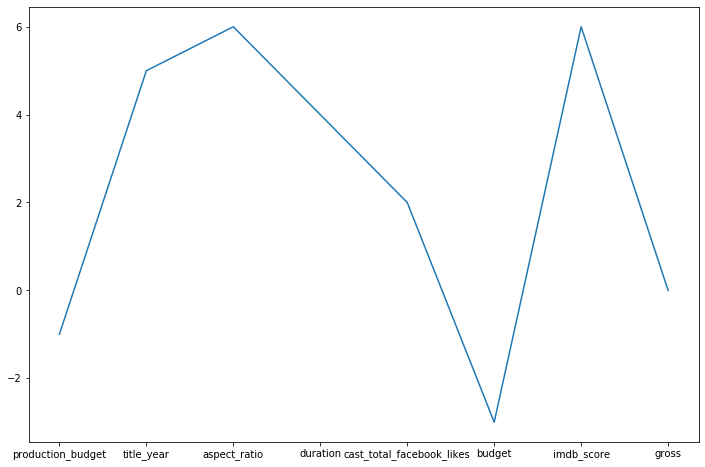

In [12]:
#Modifica el tamanio de la grafica
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(var)
#Asigna etiquetas a los ejes
plt.xticks(np.arange(8),list(x.columns))

Esto nos guía a guardar únicamente:

    production_budget
    title_year
    duration
    cast_total_facebook_likes
    imdb_score
    aspect_ratio ---> no deberia tener un score tan alto



In [13]:
var

array([-1.,  5.,  6.,  4.,  2., -3.,  6.,  0.])

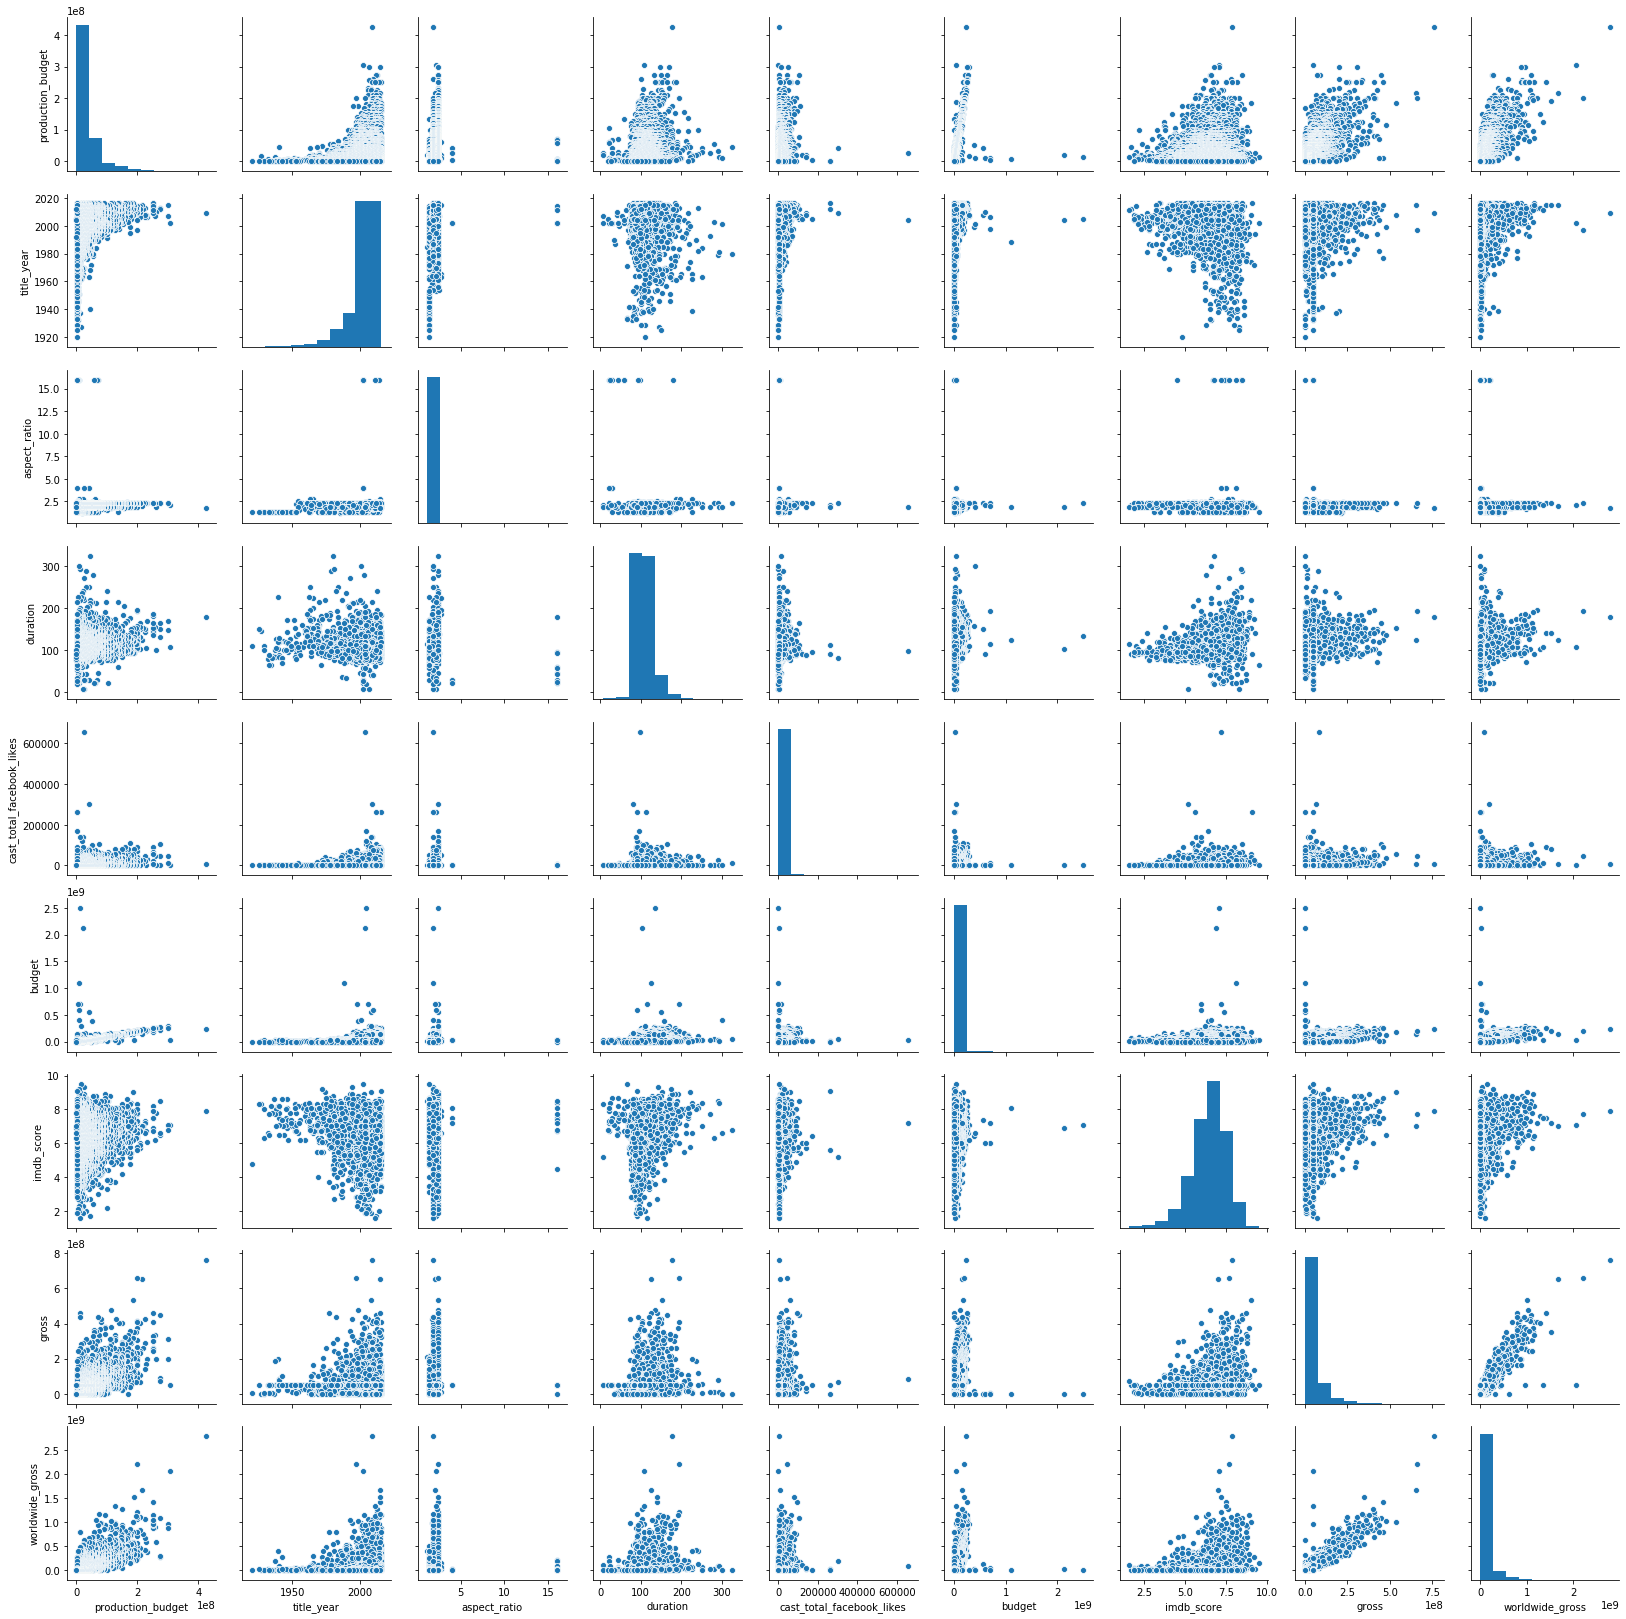

In [14]:
z = pd.concat([x,y],axis=1)
sns.pairplot(z)

In [15]:
clase = pd.cut(x['production_budget'],8).cat.codes.rename('class')
z2 = pd.concat([x,clase],axis=1)
z2.head()

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross,class
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08,7
1,306000000.0,2002.102628,2.126683,108.552703,143.0,3.712339e+07,7.1,4.819001e+07,5
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08,5
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08,5
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08,5


Pinte los valores segun la clase

Los valores se separabien y hay un patron es buena candidata

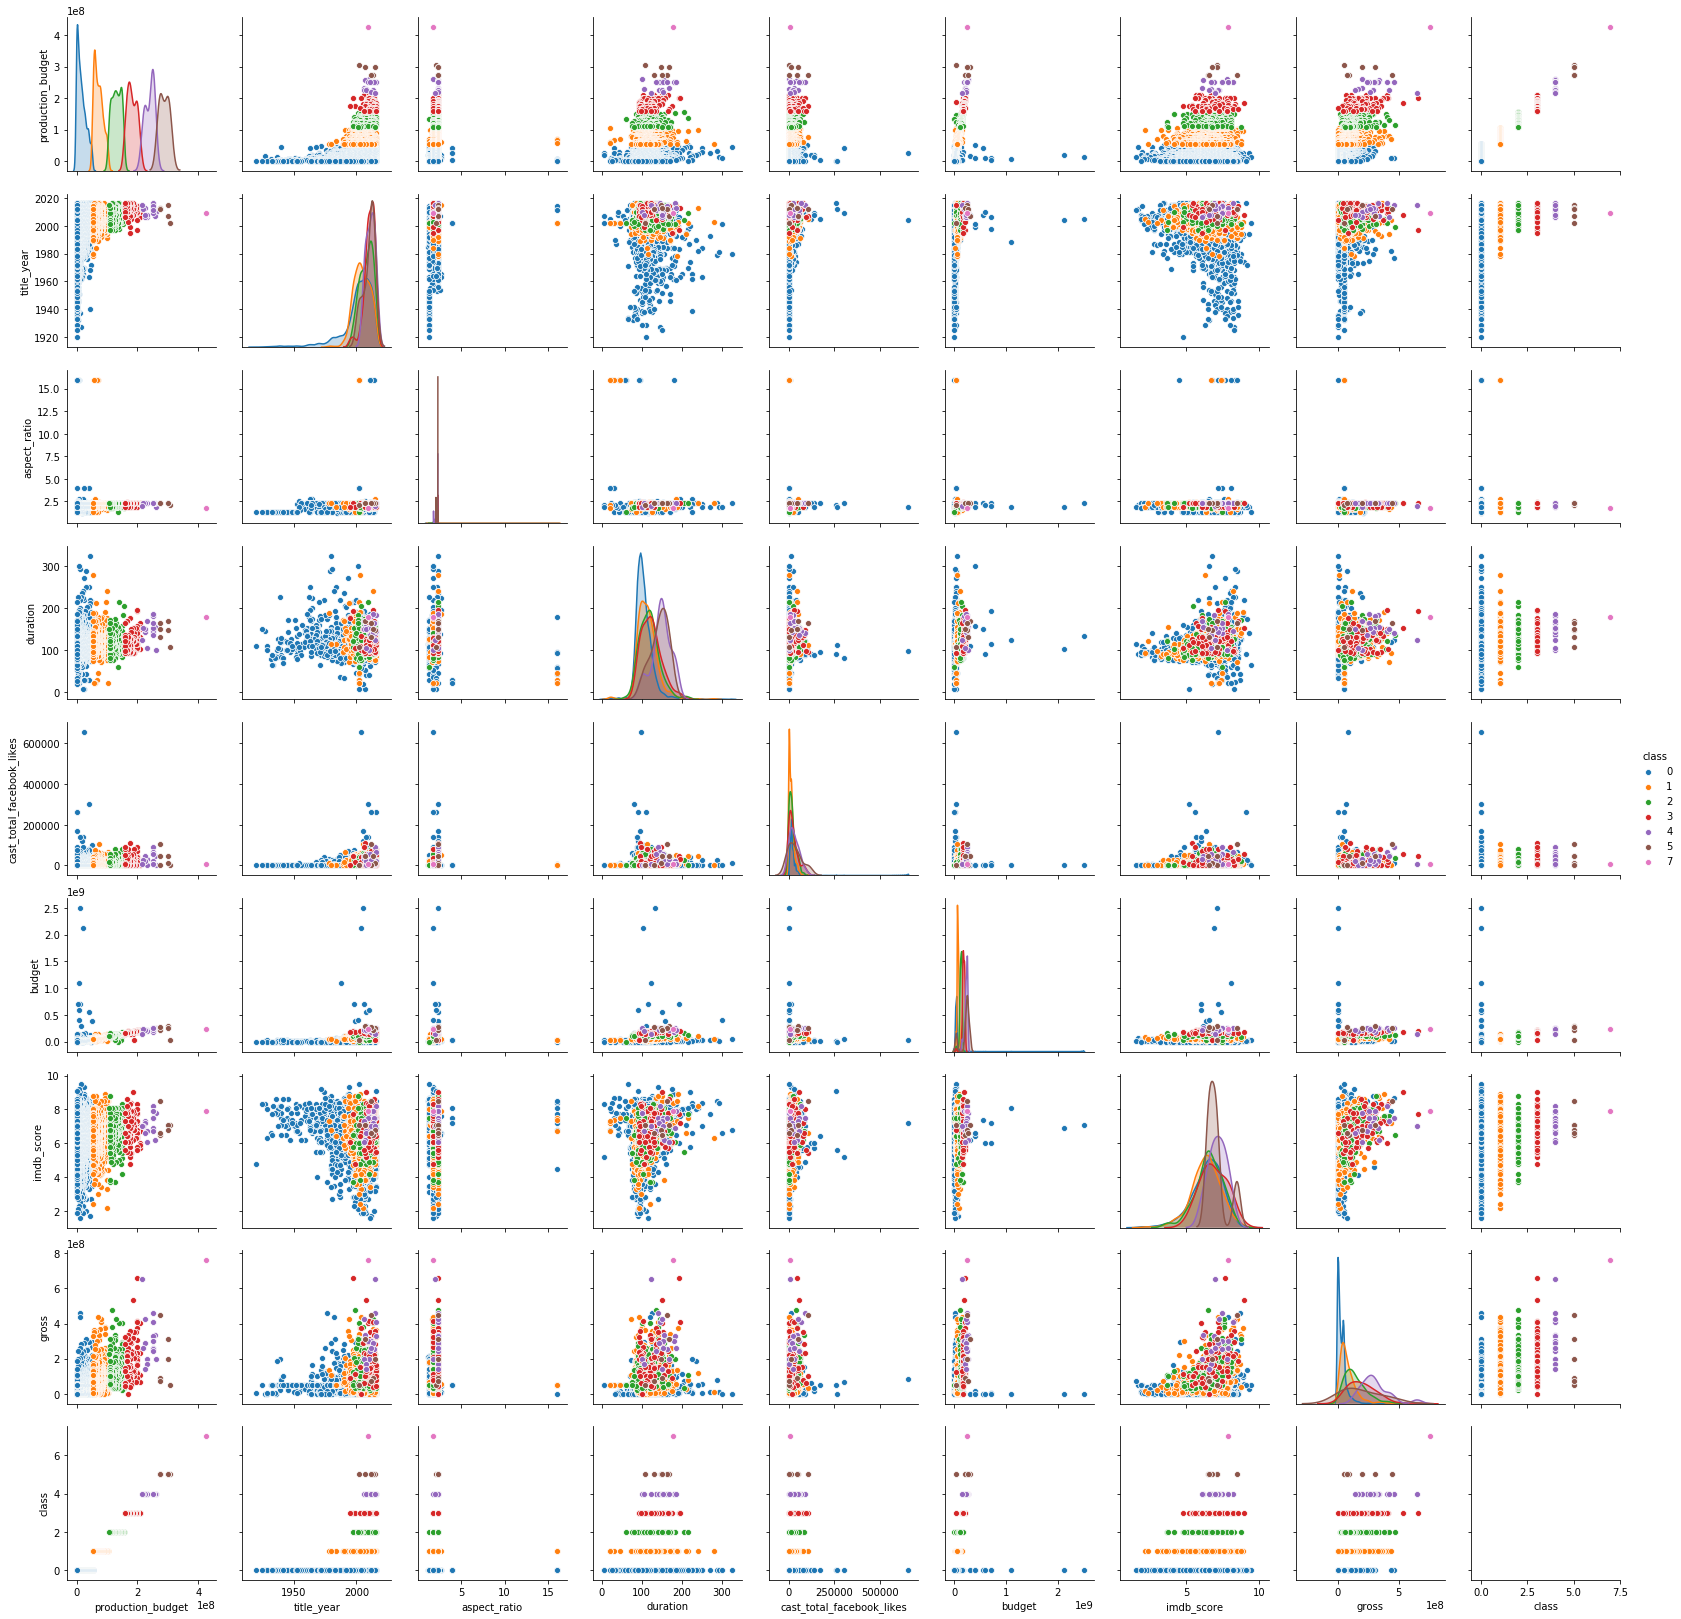

In [16]:
sns.pairplot(z2,hue='class')

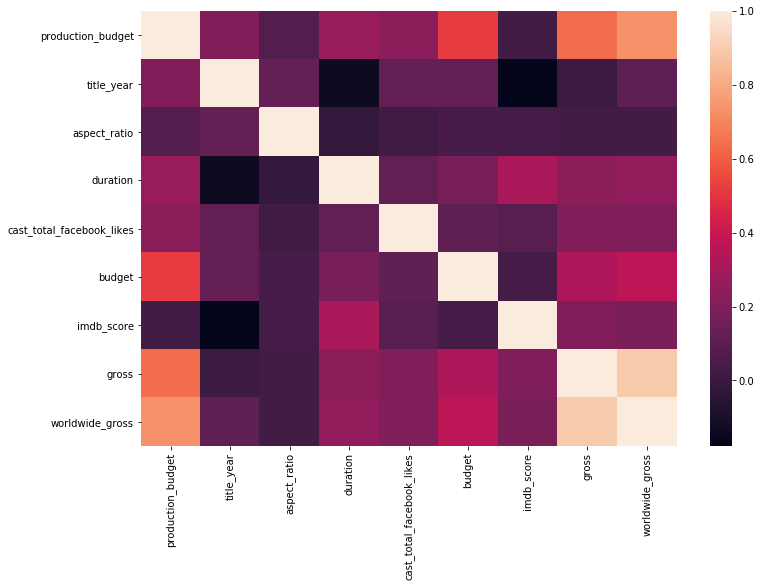

In [17]:
z3 = pd.concat([x,y],axis=1)
sns.heatmap(z3.corr())



De esto concluimos, sin sorpresa, que son muy importantes:

    production_budget
    imdb_score 
    spect_ratio ----> No deberia estar aqui



#### Metodos de selección automatica de features

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [19]:
# Creo un estimador selector
selector = SelectKBest(mutual_info_regression, k=4)
# Entreno el estimador
selector.fit(x,y)

SelectKBest(k=4,
            score_func=<function mutual_info_regression at 0x000002A547DB8AE8>)

([<matplotlib.axis.XTick at 0x2a547dc7400>,
 <a list of 7 Text xticklabel objects>)

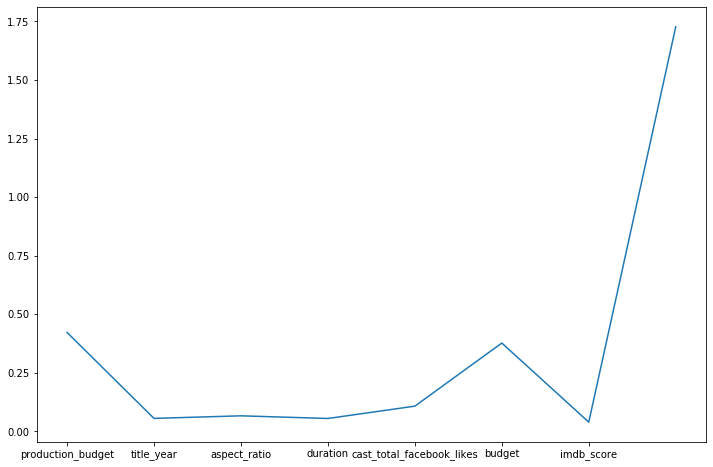

In [20]:
# Hiperparametros .scores_
scores = selector.scores_
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(scores)
plt.xticks(np.arange(7),list(x.columns))



Del analisis univariante obtenemos que las mejores features son:

    production_budget
    cast_total_facebook_likes
    budget --> "Se supone que este no deberia escogerse"



Guardaremos las 5 features entregadas por la interpretación de nuestra regresión Lasso


In [24]:
#Estas son la usadas por el profesor
x2 = x[['production_budget','title_year','duration','cast_total_facebook_likes','imdb_score']]
x3 = x[['production_budget','cast_total_facebook_likes','imdb_score']]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x,y)

In [40]:
cols2 = ['production_budget','title_year','duration','cast_total_facebook_likes','imdb_score','aspect_ratio']
x2_train, x2_test, y2_train, y2_test = X_train[cols2], X_test[cols2], y_train, y_test

cols3 = ['production_budget','cast_total_facebook_likes','budget']
x3_train, x3_test, y3_train, y3_test = X_train[cols3], X_test[cols3], y_train, y_test

#### Resultados de los modelos con las features

In [41]:
# Creaomos estimadores instanciandolos con la regresion lasso
model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(x_train,y_train)
model2.fit(x2_train,y2_train)
model3.fit(x3_train,y3_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Reducir la dimensionalidad no fue tan buena decicion, ya que no me dio buen performance

In [42]:
# Imprimamos los scores de los modelos
print(model1.score(X_test,y_test))
print(model2.score(x2_test,y2_test))
print(model3.score(x3_test,y3_test))

0.06948379372252111
0.5716443513730711
0.5482660664669676
